<a href="https://colab.research.google.com/github/astrodatos/proyecto_aape/blob/master/proyecto_AAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from astropy.io import fits
from astropy.wcs import WCS

filename = ('/content/gdrive/My Drive/Colab Notebooks/dr9q_fit.fits')
hdu_fits = fits.open(filename)
hdu = fits.open(filename)[1]
header = hdu.header
wcs = WCS(header)
print (wcs)

data=hdu.data
print (data)

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 686  87822
[('000000.47-002703.9', 1.97831659e-03, -0.45108829, 4216, 310, 55477, 0.24995296, 0.25 , -1.        , -1.00000000e+00, -1.        , -1.        , -1.00000000e+00, -1.        , -1.        ,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1.,    0.        , -1.,  0.        , -1., -300000.        , -1.,   0.        , -1.,     0.        , -1.,  0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 0.00000000e+00, -1.,   0.        , -1.,    0.        , -1.,   0.        , -1., -3.00000000e+05, -1.,   0.        , -1., 2298.67000834, -1., 64.27742969, -1.,  1.64958607e+02, -1., -14.65182438, -1., 2.23529114, -1., -16.11066829, -1., 254.741708, -1., 26.34479015, -1., -15.04412284, -1., -5.4489311e+01, -1., -13.12042921, -1., -12.90400265, -1., -12.7601818 , -1., [ 3.32646096, -0.375910

In [0]:
from astropy.table import Table
import pandas as pd

table=Table.read(hdu_fits)
table.colnames
#table['SDSS_NAME', 'PLATE']

['SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'FIBER',
 'MJD',
 'Z_PIPE',
 'Z_VI',
 'Z_PCA',
 'FWHM_CIV_FPG',
 'REW_CIV_FPG',
 'REW_CIV_ERR_FPG',
 'FWHM_MGII_FPG',
 'REW_MGII_FPG',
 'REW_MGII_ERR_FPG',
 'FWHM_CIV',
 'FWHM_CIV_ERR',
 'REW_CIV',
 'REW_CIV_ERR',
 'VOFF_CIV',
 'VOFF_CIV_ERR',
 'LOGF_CIV',
 'LOGF_CIV_ERR',
 'FWHM_CIII',
 'FWHM_CIII_ERR',
 'REW_CIII',
 'REW_CIII_ERR',
 'VOFF_CIII',
 'VOFF_CIII_ERR',
 'LOGF_CIII',
 'LOGF_CIII_ERR',
 'FWHM_ALIII',
 'FWHM_ALIII_ERR',
 'REW_ALIII',
 'REW_ALIII_ERR',
 'VOFF_ALIII',
 'VOFF_ALIII_ERR',
 'LOGF_ALIII',
 'LOGF_ALIII_ERR',
 'REW_SIIII',
 'REW_SIIII_ERR',
 'LOGF_SIIII',
 'LOGF_SIIII_ERR',
 'FWHM_MGII',
 'FWHM_MGII_ERR',
 'REW_MGII',
 'REW_MGII_ERR',
 'VOFF_MGII',
 'VOFF_MGII_ERR',
 'LOGF_MGII',
 'LOGF_MGII_ERR',
 'FWHM_BROAD_HB',
 'FWHM_BROAD_HB_ERR',
 'REW_BROAD_HB',
 'REW_BROAD_HB_ERR',
 'VOFF_BROAD_HB',
 'VOFF_BROAD_HB_ERR',
 'LOGF_BROAD_HB',
 'LOGF_BROAD_HB_ERR',
 'REW_NARROW_HB',
 'REW_NARROW_HB_ERR',
 'LOGF_NARROW_HB',
 'LOGF_NARROW_HB_

In [0]:
QuasarTable= table['SDSS_NAME', 'Z_PIPE','Z_VI','Z_PCA','LOGF_CIV','LOGF_CIV_ERR',
                   'LOGF_CIII','LOGF_CIII_ERR','LOGF_ALIII','LOGF_ALIII_ERR',
                   'LOGF_SIIII','LOGF_SIIII_ERR','LOGF_MGII','LOGF_MGII_ERR',
                   'LOGF_BROAD_HB','LOGF_BROAD_HB_ERR','LOGF_NARROW_HB',
                   'LOGF_NARROW_HB_ERR','LOGF_OIII_5007','LOGF_OIII_5007_ERR',
                   'LOGF1350','LOGF1350_ERR','LOGF3000','LOGF3000_ERR','LOGF5100',
                   'LOGF5100_ERR']
QuasarTable['class']='QUASAR'
QuasarTable

SDSS_NAME,Z_PIPE,Z_VI,Z_PCA,LOGF_CIV,LOGF_CIV_ERR,LOGF_CIII,LOGF_CIII_ERR,LOGF_ALIII,LOGF_ALIII_ERR,LOGF_SIIII,LOGF_SIIII_ERR,LOGF_MGII,LOGF_MGII_ERR,LOGF_BROAD_HB,LOGF_BROAD_HB_ERR,LOGF_NARROW_HB,LOGF_NARROW_HB_ERR,LOGF_OIII_5007,LOGF_OIII_5007_ERR,LOGF1350,LOGF1350_ERR,LOGF3000,LOGF3000_ERR,LOGF5100,LOGF5100_ERR,class
str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6
000000.47-002703.9,0.24995295703411102,0.25,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-14.65182438231868,-1.0,-16.110668291496495,-1.0,-15.04412284248246,-1.0,-13.120429210786082,-1.0,-12.904002646679636,-1.0,-12.760181804702583,-1.0,QUASAR
000001.93-001427.4,2.1645307540893555,2.163,2.1600770125260818,-14.365271657331485,-1.0,-15.148776656013794,-1.0,-15.615987159317584,-1.0,-14.696218911079507,-1.0,-15.051001058208485,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-12.658990276491146,-1.0,-13.021065130436128,-1.0,-13.261672888398198,-1.0,QUASAR
000003.17+011510.6,2.354281187057495,2.354,2.352232606583584,-14.665869568966045,-1.0,-14.992532227472173,-1.0,-15.319727770673868,-1.0,0.0,-1.0,-15.341535565628329,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.01066628984442,-1.0,-13.513841123176414,-1.0,-13.848213331552273,-1.0,QUASAR
000004.61+035122.4,2.795008420944214,2.795,2.7860188036431373,-14.668890299079425,-1.0,-15.211973046561669,-1.0,-15.79280866543717,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.592787490749963,-1.0,-13.661024457420178,-1.0,-13.70636962122199,-1.0,QUASAR
000004.96-001642,2.879408121109009,2.879,2.8917108021087694,-14.931736862166844,-1.0,-15.242458029703393,-1.0,-15.81921541286709,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.639728082120913,-1.0,-13.839519170035096,-1.0,-13.972285323773956,-1.0,QUASAR
000005.02-003829,2.661775827407837,2.662,2.6578862549119693,-14.737058325267366,-1.0,-15.052214167147367,-1.0,-15.312190374673959,-1.0,-15.847419215921606,-1.0,-14.202602873642363,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.337832439337294,-1.0,-13.657385727857172,-1.0,-13.869736846589813,-1.0,QUASAR
000007.58+002943.2,2.259803056716919,2.254,2.2567264517498855,-14.254588412916753,-1.0,-14.97676990106867,-1.0,-16.171391997120104,-1.0,0.0,-1.0,-14.704092143246513,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.13401466715044,-1.0,-13.178771900626616,-1.0,-13.208514196955552,-1.0,QUASAR
000009.27+020622,1.4354486465454102,1.432,1.43395907262234,-14.019072405422975,-1.0,-14.29541770583723,-1.0,-15.069484901680504,-1.0,0.0,-1.0,-14.639071121772703,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-12.591865733638436,-1.0,-12.729344404986849,-1.0,-12.820702406019896,-1.0,QUASAR
000013.03+044403.5,2.620950222015381,2.624,2.6208277084362175,-14.85711908311641,-1.0,-14.966410116104147,-1.0,-15.409649599110633,-1.0,0.0,-1.0,-15.101606422508821,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-13.283912874226617,-1.0,-13.449451585845008,-1.0,-13.559456182475968,-1.0,QUASAR


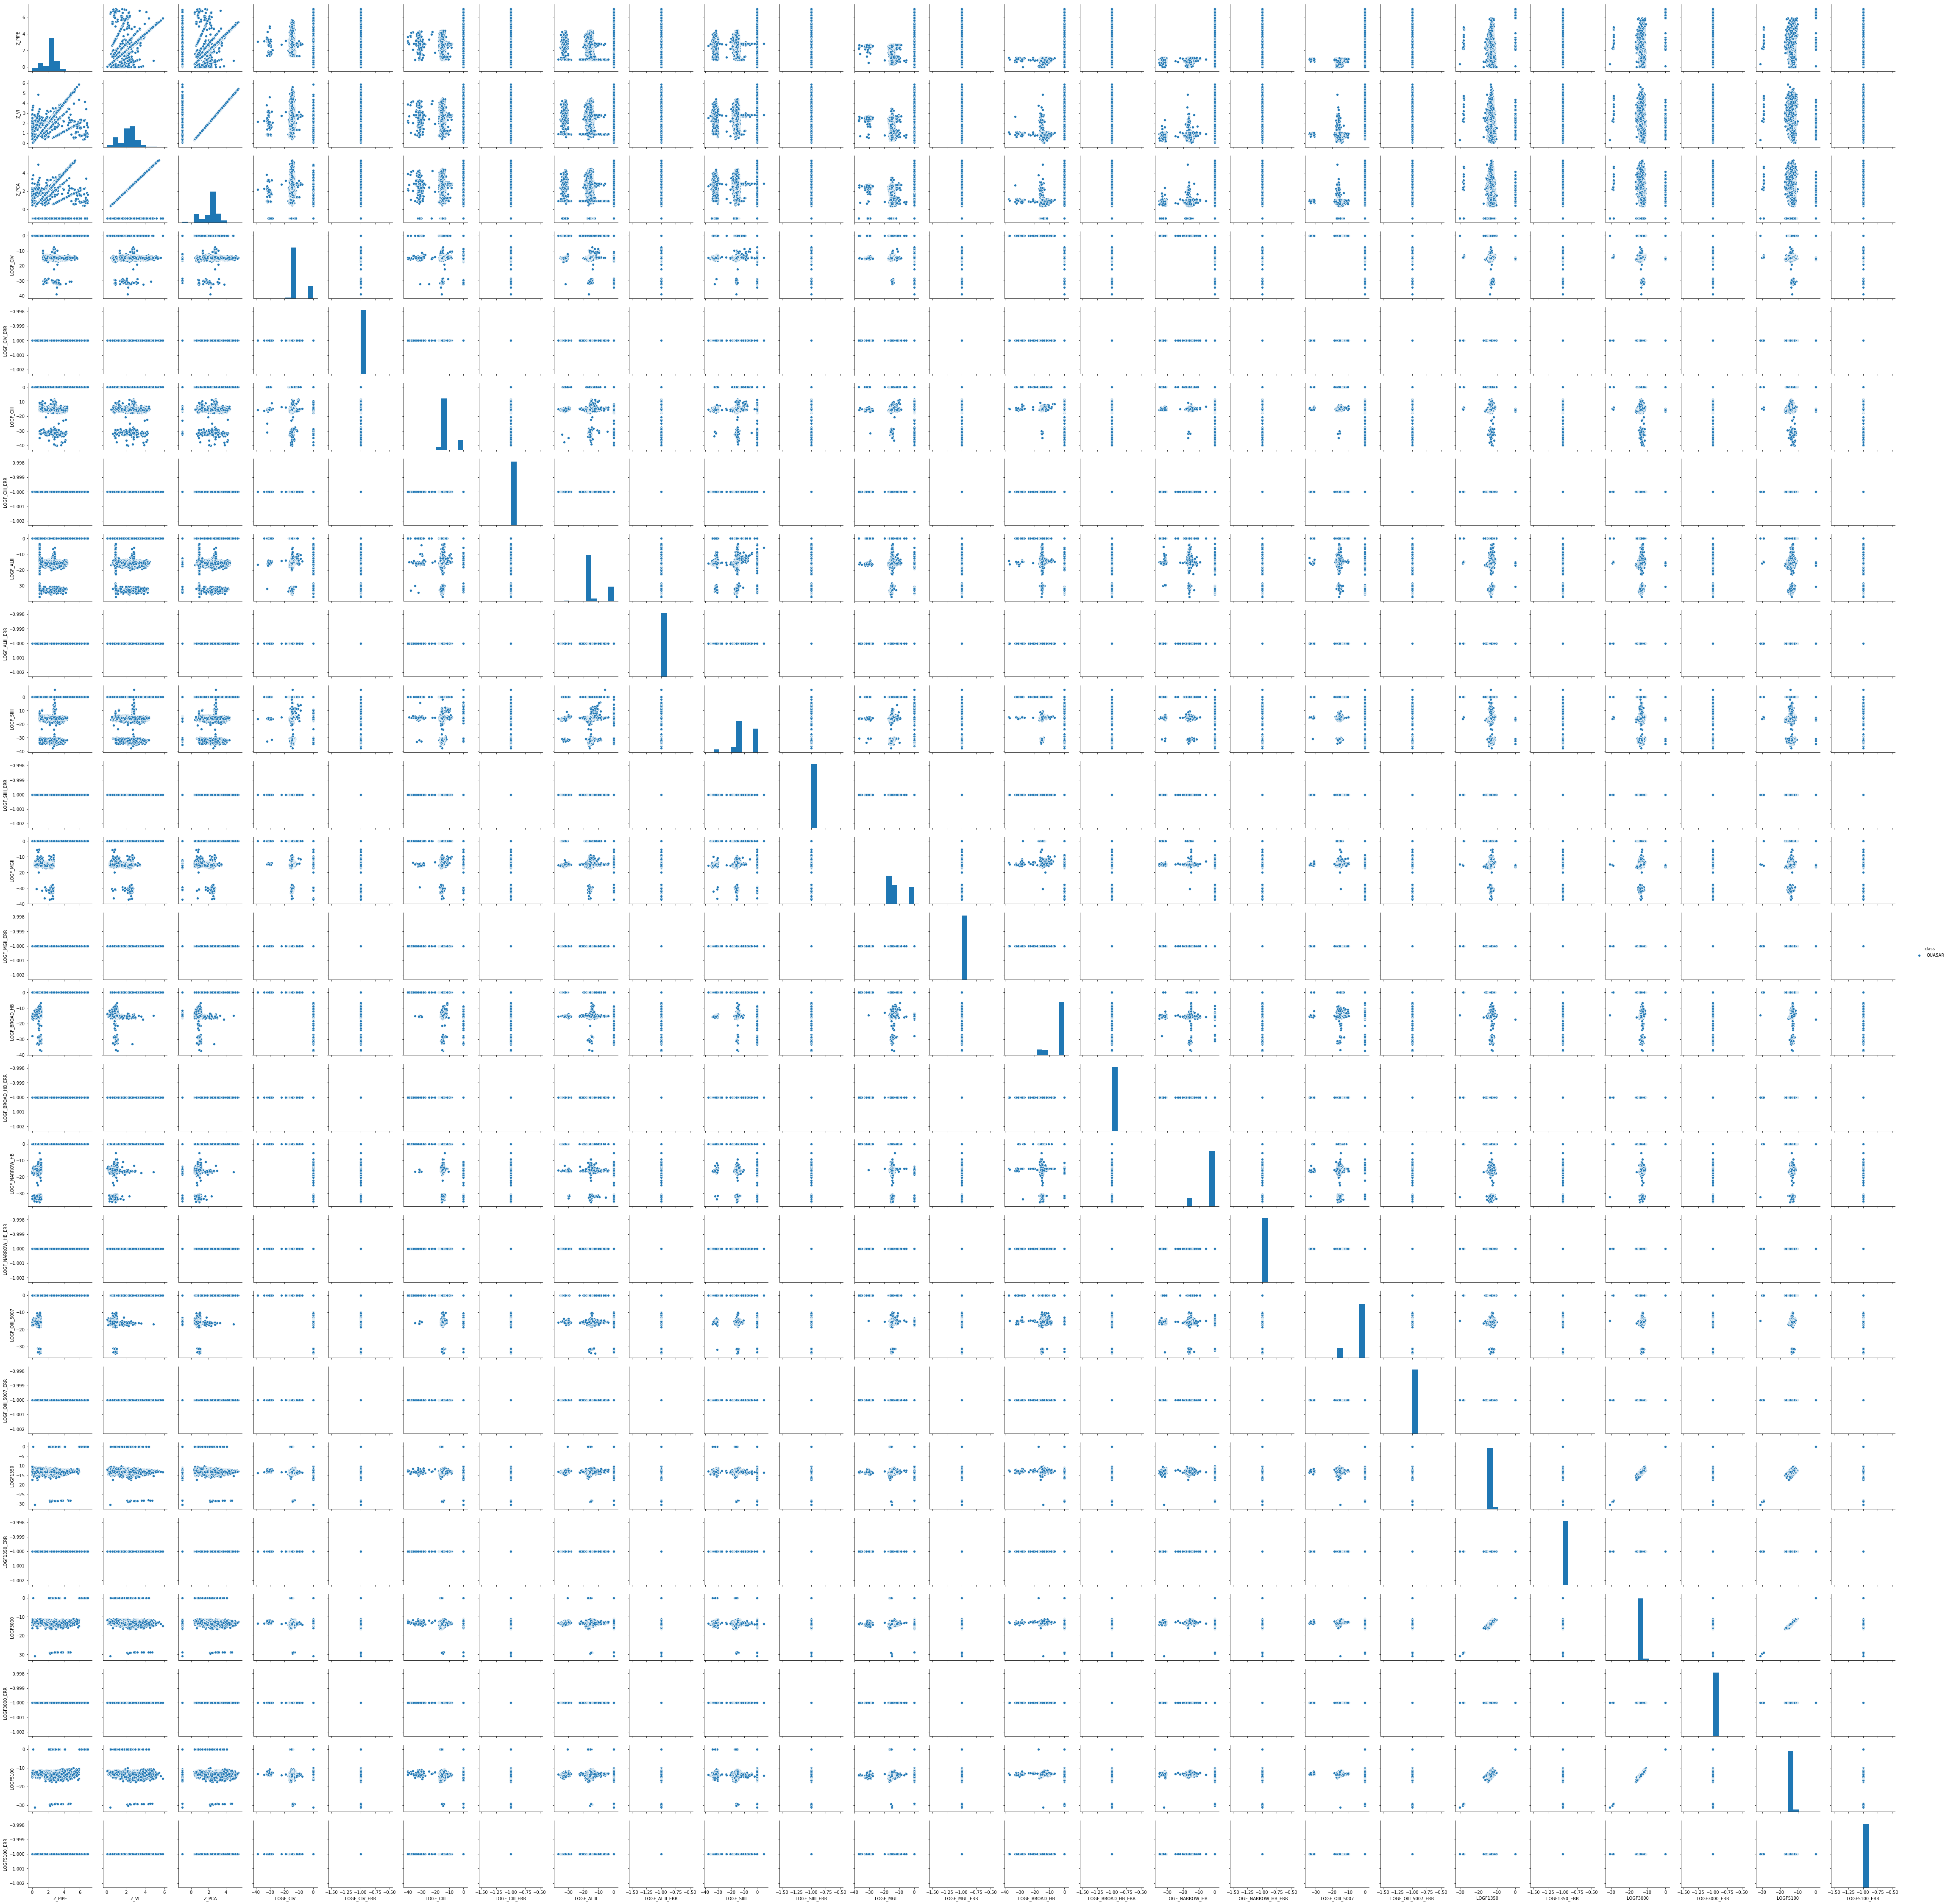

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
%matplotlib inline
data_quasar=QuasarTable.to_pandas()
sns.pairplot(data_quasar,hue='class' , diag_kind = 'hist')